In [2]:
import numpy as np
import os
import gsd
import gsd.hoomd
workdir = "/scratch/projects/hockygroup/sp6310/ionic_crystal/ionic_crystal/ExperimentalData/New_simulation2/corrected_pot2/bulk_simulations/\
NaCl_simulations/charged_wall/numberratio1-2/prod2_v2/bulk_LS2.5_FP0.33_RN80_BL10_DL5.9"
gsdfile1 = os.path.join(workdir, "crystal_ls2.5_dl5.9.gsd")
gsdfile2 = os.path.join(workdir, "crystal2_ls2.5_dl5.9.gsd")
traj1 = gsd.hoomd.open(gsdfile1, mode = "rb")
traj2 = gsd.hoomd.open(gsdfile2, mode = "rb")
#print(len(traj))

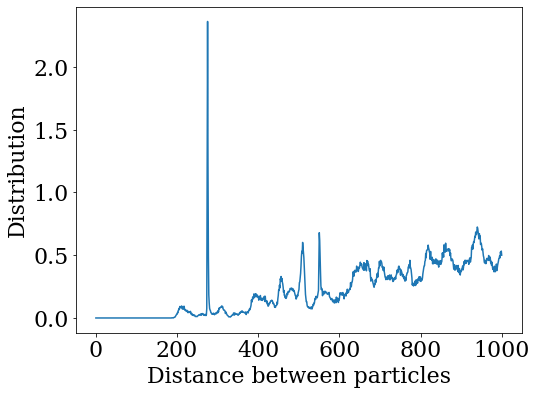

In [9]:
snap = traj1[0]
npart = snap.particles.N
typeids = snap.particles.typeid
positions = snap.particles.position
rall = []
for i in range(len(positions)):
    pos = positions[i]
    posbrd = np.broadcast_to(pos, (npart-1,3))
    positions_ = np.delete(positions, i, axis=0)
    dr = posbrd - positions_
    r = np.sqrt(np.sum(dr**2,axis=1))
    #nbrind = np.where(r<1000)[0]
    r_nbr = r[r<1000]
    rall.extend(r_nbr)

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 22}
matplotlib.rc('font', **font)
hist, bin_edges = np.histogram(rall, range=(0,1000), bins=1000)
bins = (bin_edges[1:]+bin_edges[:-1])/2
plt.figure(figsize=(8,6))
plt.plot(bins,hist/npart)
plt.xlabel("Distance between particles")
plt.ylabel("Distribution")
plt.savefig(os.path.join(workdir,"distribution_crystal_ls2.5_dl5.9.eps"), format="eps",dpi=2000,bbox_inches='tight')

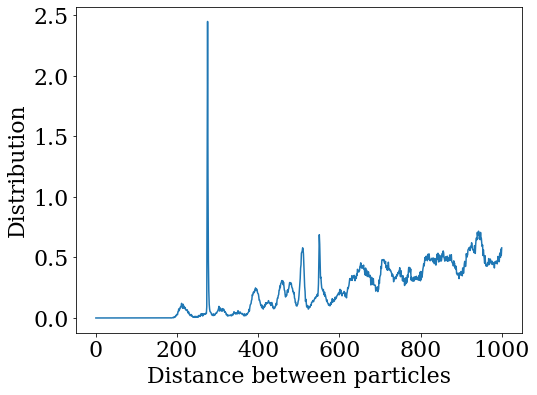

In [8]:
snap = traj2[0]
npart = snap.particles.N
typeids = snap.particles.typeid
positions = snap.particles.position
rall = []
for i in range(len(positions)):
    pos = positions[i]
    posbrd = np.broadcast_to(pos, (npart-1,3))
    positions_ = np.delete(positions, i, axis=0)
    dr = posbrd - positions_
    r = np.sqrt(np.sum(dr**2,axis=1))
    #nbrind = np.where(r<1000)[0]
    r_nbr = r[r<1000]
    rall.extend(r_nbr)

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 22}
matplotlib.rc('font', **font)
hist, bin_edges = np.histogram(rall, range=(0,1000), bins=1000)
bins = (bin_edges[1:]+bin_edges[:-1])/2
plt.figure(figsize=(8,6))
plt.plot(bins,hist/npart)
plt.xlabel("Distance between particles")
plt.ylabel("Distribution")
plt.savefig(os.path.join(workdir,"distribution_crystal2_ls2.5_dl5.9.eps"), format="eps",dpi=2000,bbox_inches='tight')